# Logistic Regression on the Snacks Dataset

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import *
from keras import optimizers

Using TensorFlow backend.


## Building the model

In [2]:
image_width = 32
image_height = 32
num_classes = 20

In [3]:
model = Sequential()
model.add(Flatten(input_shape=(image_height, image_width, 3)))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                61460     
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
Total params: 61,460
Trainable params: 61,460
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=["accuracy"])

## Loading the data

In [6]:
images_dir = "snacks/"
train_data_dir = images_dir + "train/"
val_data_dir = images_dir + "val/"
test_data_dir = images_dir + "test/"

In [7]:
from keras.preprocessing import image
img = image.load_img(train_data_dir + "apple/cecd90f5d46f57b0.jpg", 
                     target_size=(image_width, image_height))

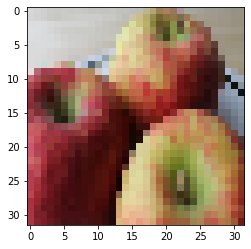

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img)

In [9]:
x = image.img_to_array(img)

In [10]:
x

array([[[215., 215., 217.],
        [211., 211., 211.],
        [207., 207., 207.],
        ...,
        [152., 150., 137.],
        [148., 146., 133.],
        [149., 147., 132.]],

       [[213., 213., 215.],
        [210., 210., 210.],
        [207., 207., 207.],
        ...,
        [157., 150., 134.],
        [153., 146., 130.],
        [153., 146., 128.]],

       [[219., 220., 222.],
        [220., 221., 223.],
        [218., 219., 221.],
        ...,
        [156., 149., 133.],
        [152., 145., 129.],
        [153., 146., 130.]],

       ...,

       [[172.,  50.,  65.],
        [131.,  34.,  41.],
        [ 95.,  23.,  27.],
        ...,
        [193., 121.,  81.],
        [181.,  90.,  63.],
        [140.,  68.,  46.]],

       [[168.,  54.,  64.],
        [123.,  32.,  41.],
        [118.,  33.,  40.],
        ...,
        [177., 118.,  74.],
        [163.,  64.,  45.],
        [136.,  49.,  39.]],

       [[165.,  55.,  66.],
        [132.,  35.,  46.],
        [120.,  

In [11]:
def normalize_pixels(image):
    return image / 127.5 - 1

In [12]:
x = image.img_to_array(img)
x = normalize_pixels(x)
x = np.expand_dims(x, axis=0)

In [13]:
x.shape

(1, 32, 32, 3)

In [14]:
x

array([[[[ 0.6862745 ,  0.6862745 ,  0.7019608 ],
         [ 0.654902  ,  0.654902  ,  0.654902  ],
         [ 0.62352943,  0.62352943,  0.62352943],
         ...,
         [ 0.19215691,  0.17647064,  0.07450986],
         [ 0.16078436,  0.14509809,  0.04313731],
         [ 0.1686275 ,  0.15294123,  0.03529418]],

        [[ 0.67058825,  0.67058825,  0.6862745 ],
         [ 0.64705884,  0.64705884,  0.64705884],
         [ 0.62352943,  0.62352943,  0.62352943],
         ...,
         [ 0.2313726 ,  0.17647064,  0.05098045],
         [ 0.20000005,  0.14509809,  0.0196079 ],
         [ 0.20000005,  0.14509809,  0.00392163]],

        [[ 0.7176471 ,  0.7254902 ,  0.7411765 ],
         [ 0.7254902 ,  0.73333335,  0.7490196 ],
         [ 0.70980394,  0.7176471 ,  0.73333335],
         ...,
         [ 0.22352946,  0.1686275 ,  0.04313731],
         [ 0.19215691,  0.13725495,  0.01176476],
         [ 0.20000005,  0.14509809,  0.0196079 ]],

        ...,

        [[ 0.34901965, -0.60784316, -0

In [15]:
x.mean()

-0.098154075

In [16]:
x.std()

0.52534205

## Making a prediction with the untrained model

In [17]:
pred = model.predict(x)
print(pred)

[[0.13864781 0.05875769 0.01606221 0.06414423 0.03024339 0.01983942
  0.07829567 0.00972674 0.01924711 0.15570098 0.02290487 0.01670541
  0.07535105 0.14817312 0.0126835  0.01829712 0.04879378 0.01755643
  0.02502218 0.02384727]]


In [18]:
pred.sum()

1.0

In [19]:
np.argmax(pred)

9

In [20]:
np.max(pred)

0.15570098

## Using generators

In [21]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(preprocessing_function=normalize_pixels)

In [22]:
batch_size = 64

train_generator = datagen.flow_from_directory(
                    train_data_dir,
                    target_size=(image_width, image_height),
                    batch_size=batch_size,
                    class_mode="categorical",
                    shuffle=True)

val_generator = datagen.flow_from_directory(
                    val_data_dir,
                    target_size=(image_width, image_height),
                    batch_size=batch_size,
                    class_mode="categorical",
                    shuffle=False)

test_generator = datagen.flow_from_directory(
                    test_data_dir,
                    target_size=(image_width, image_height),
                    batch_size=batch_size,
                    class_mode="categorical",
                    shuffle=False)

Found 4838 images belonging to 20 classes.
Found 955 images belonging to 20 classes.
Found 952 images belonging to 20 classes.


In [23]:
x, y = next(train_generator)
print(x.shape)
print(y.shape)

(64, 32, 32, 3)
(64, 20)


## Looking at the labels

In [24]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0.], dtype=float32)

In [25]:
train_generator.class_indices

{'apple': 0,
 'banana': 1,
 'cake': 2,
 'candy': 3,
 'carrot': 4,
 'cookie': 5,
 'doughnut': 6,
 'grape': 7,
 'hot dog': 8,
 'ice cream': 9,
 'juice': 10,
 'muffin': 11,
 'orange': 12,
 'pineapple': 13,
 'popcorn': 14,
 'pretzel': 15,
 'salad': 16,
 'strawberry': 17,
 'waffle': 18,
 'watermelon': 19}

In [26]:
index2class = {v:k for k,v in train_generator.class_indices.items()}
index2class

{0: 'apple',
 1: 'banana',
 2: 'cake',
 3: 'candy',
 4: 'carrot',
 5: 'cookie',
 6: 'doughnut',
 7: 'grape',
 8: 'hot dog',
 9: 'ice cream',
 10: 'juice',
 11: 'muffin',
 12: 'orange',
 13: 'pineapple',
 14: 'popcorn',
 15: 'pretzel',
 16: 'salad',
 17: 'strawberry',
 18: 'waffle',
 19: 'watermelon'}

In [27]:
index2class[np.argmax(y[0])]

'strawberry'

## Evaluating the untrained model on the entire dataset

In [31]:
model.evaluate_generator(test_generator, steps=len(test_generator))

[3.2943690844944546, 0.06197479010379615]

In [33]:
model.evaluate_generator(train_generator, steps=len(train_generator))

[3.298702133840251, 0.05353451837139122]

In [34]:
model.evaluate_generator(val_generator, steps=len(val_generator))

[3.3391019656396037, 0.04502617801242162]

## Training

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
model.fit_generator(train_generator, 
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    epochs=5,
                    workers=4)

Epoch 1/5
76/76 [==============================] - 33s 429ms/step - loss: 3.0703 - acc: 0.1099 - val_loss: 3.1100 - val_acc: 0.1152
Epoch 2/5
76/76 [==============================] - 3s 38ms/step - loss: 2.7117 - acc: 0.2078 - val_loss: 3.0585 - val_acc: 0.1246
Epoch 3/5
76/76 [==============================] - 3s 42ms/step - loss: 2.4977 - acc: 0.2646 - val_loss: 3.1021 - val_acc: 0.1204
Epoch 4/5
76/76 [==============================] - 3s 41ms/step - loss: 2.3495 - acc: 0.3134 - val_loss: 3.1261 - val_acc: 0.1246
Epoch 5/5
76/76 [==============================] - 3s 38ms/step - loss: 2.2028 - acc: 0.3631 - val_loss: 3.1804 - val_acc: 0.1204


In [40]:
model.fit_generator(train_generator, 
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    epochs=10,
                    workers=4)

Epoch 1/10
76/76 [==============================] - 28s 372ms/step - loss: 2.0620 - acc: 0.4093 - val_loss: 3.1856 - val_acc: 0.1141
Epoch 2/10
76/76 [==============================] - 3s 45ms/step - loss: 1.9758 - acc: 0.4453 - val_loss: 3.2545 - val_acc: 0.1058
Epoch 3/10
76/76 [==============================] - 3s 36ms/step - loss: 1.8942 - acc: 0.4736 - val_loss: 3.2362 - val_acc: 0.1351
Epoch 4/10
76/76 [==============================] - 3s 41ms/step - loss: 1.8108 - acc: 0.4960 - val_loss: 3.2788 - val_acc: 0.1277
Epoch 5/10
76/76 [==============================] - 3s 40ms/step - loss: 1.7322 - acc: 0.5246 - val_loss: 3.2934 - val_acc: 0.1246
Epoch 6/10
76/76 [==============================] - 3s 41ms/step - loss: 1.6665 - acc: 0.5440 - val_loss: 3.3457 - val_acc: 0.1236
Epoch 7/10
76/76 [==============================] - 3s 39ms/step - loss: 1.6005 - acc: 0.5774 - val_loss: 3.3879 - val_acc: 0.1026
Epoch 8/10
76/76 [==============================] - 3s 39ms/step - loss: 1.5361 -

In [42]:
model.evaluate_generator(test_generator, steps=len(test_generator))

[3.5019439208407364, 0.11659663870241962]

In [43]:
model.fit_generator(train_generator, 
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    epochs=10,
                    workers=4)

Epoch 1/10
76/76 [==============================] - 3s 38ms/step - loss: 1.3760 - acc: 0.6388 - val_loss: 3.5221 - val_acc: 0.1079
Epoch 2/10
76/76 [==============================] - 3s 37ms/step - loss: 1.3229 - acc: 0.6603 - val_loss: 3.5990 - val_acc: 0.1131
Epoch 3/10
76/76 [==============================] - 3s 36ms/step - loss: 1.2889 - acc: 0.6746 - val_loss: 3.6058 - val_acc: 0.1037
Epoch 4/10
76/76 [==============================] - 3s 36ms/step - loss: 1.2519 - acc: 0.6956 - val_loss: 3.6024 - val_acc: 0.1298
Epoch 5/10
76/76 [==============================] - 3s 37ms/step - loss: 1.2255 - acc: 0.6968 - val_loss: 3.6954 - val_acc: 0.1047
Epoch 6/10
76/76 [==============================] - 3s 38ms/step - loss: 1.1756 - acc: 0.7208 - val_loss: 3.7533 - val_acc: 0.1047
Epoch 7/10
76/76 [==============================] - 3s 38ms/step - loss: 1.1472 - acc: 0.7268 - val_loss: 3.7801 - val_acc: 0.1110
Epoch 8/10
76/76 [==============================] - 3s 40ms/step - loss: 1.1100 - a

In [44]:
model.evaluate_generator(test_generator, steps=len(test_generator))

[3.8502991019176838, 0.11449579841324262]